<a href="https://colab.research.google.com/github/sujiDuddaiyan/GLM/blob/main/GLM_topic_modelling2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import nltk
import re
import string
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize


In [ ]:
df = pd.read_csv("/content/CH.csv")
df.head()

,CITY NAME,ZONE NAME,NAME OF HERITAGE,"NATURE OF HERITAGE(OPEN SPACE, MONUMENTS, STREET ETC.)",HERITAGE USE,AGE OF HERITAGE (IN YEARS)
0,AHMEDABAD,CENTRAL ZONE,Achyut kuki s Bibi s Masjid and tomb,Protected Monument under A.S.I.,Religious,15th to 18th Century A.D.
1,AHMEDABAD,CENTRAL ZONE,Dariyakhan s Tomb,Protected Monument under A.S.I.,Religious,15th to 18th Century A.D.
2,AHMEDABAD,CENTRAL ZONE,Sidi Bashir s Minars Tomb shaki...,Protected Monument under A.S.I.,Religious,15th to 18th Century A.D.
3,AHMEDABAD,CENTRAL ZONE,Brick Minar,Protected Monument under A.S.I.,Reduntent ; tourisim,15th to 18th Century A.D.
4,AHMEDABAD,CENTRAL ZONE,Three Gates,Protected Monument under A.S.I.,Religious,15th to 18th Century A.D.


In [ ]:
drop_col = ["AGE OF HERITAGE (IN YEARS)","CITY NAME","ZONE NAME","NATURE OF HERITAGE(OPEN SPACE, MONUMENTS, STREET ETC.)","HERITAGE USE"] # Removed the extra tab character at the end of the fourth string in the list
df = df.drop(drop_col, axis = 1)
df.head(5)

,NAME OF HERITAGE
0,Achyut kuki s Bibi s Masjid and tomb
1,Dariyakhan s Tomb
2,Sidi Bashir s Minars Tomb shaki...
3,Brick Minar
4,Three Gates


In [ ]:
df.shape


(56, 1)

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
df = pd.DataFrame(df)
# Initialize preprocessing tools
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Lowercasing
    text = text.lower()
    # Removing punctuation
    text = re.sub(r'[^\w\s]', '', text)
    #removng numbers
    text = re.sub(r'\d+', '', text)
    # Tokenization
    tokens = word_tokenize(text)

    # Removing stop words
    tokens = [word for word in tokens if word not in stop_words]

    # Stemming
    tokens = [stemmer.stem(word) for word in tokens]


    # Reconstruct text from tokens
    return ' '.join(tokens)



In [ ]:
# Apply preprocessing to the 'NAME OF HERITAGE' column
df['PROCESSED HERITAGE NAME'] = df['NAME OF HERITAGE'].apply(preprocess_text)

# Display the DataFrame with the processed column
print(df[['NAME OF HERITAGE', 'PROCESSED HERITAGE NAME']])



                                     NAME OF HERITAGE  \
0           Achyut  kuki  s   Bibi  s Masjid and tomb   
1                                  Dariyakhan  s Tomb   
2   Sidi Bashir  s Minars  Tomb              shaki...   
3                                         Brick Minar   
4                                         Three Gates   
5                                        Bhadra Tower   
6                      Teen darwaja or Tripollia gate   
7              Shah kupai Masjid  AKUB SAHEB MOSQUE     
8                                  Sidi Saiyed Mosque   
9                            Qutubudin Shah  s Mosque   
10                                         Delhi Gate   
11                            Rani Rupavati  s Mosque   
12       Kazi Mohmed Chisti  s Masjid  Shaikh Hasan     
13                                       Astodia Gate   
14                      Rani Sipri  s Mosque and tomb   
15                               Dasturkhan  s Masjid   
16      Nawab Sardarkhan  s Mas

In [ ]:
!pip install gensim
import gensim.corpora as corpora



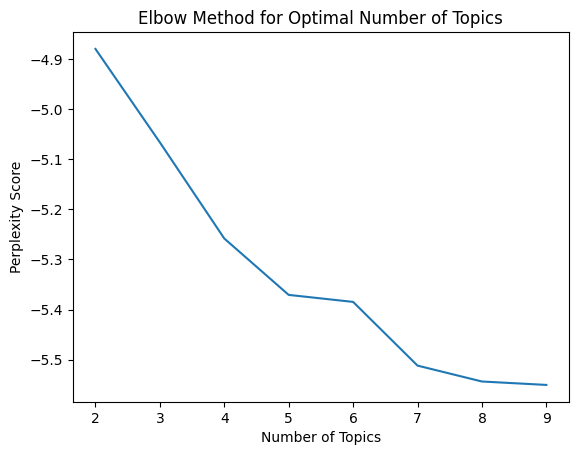

In [ ]:
# Store the tokens in a new column 'tokens'
df['tokens'] = df['PROCESSED HERITAGE NAME'].apply(word_tokenize)  # Tokenize the processed text


# Create a dictionary and corpus for LDA
dictionary = corpora.Dictionary(df['tokens'])
corpus = [dictionary.doc2bow(tokens) for tokens in df['tokens']]

import matplotlib.pyplot as plt
from gensim.models import LdaModel
def compute_perplexity_values(dictionary, corpus, limit, start=2, step=1):
    perplexity_values = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary, passes=15)
        perplexity = model.log_perplexity(corpus)
        perplexity_values.append(perplexity)
    return perplexity_values

# Run LDA for different number of topics
start, limit, step = 2, 10, 1
perplexity_values = compute_perplexity_values(dictionary, corpus, limit, start, step)

# Plot the perplexity scores
x = range(start, limit, step)
plt.plot(x, perplexity_values)
plt.xlabel("Number of Topics")
plt.ylabel("Perplexity Score")
plt.title("Elbow Method for Optimal Number of Topics")
plt.show()


In [ ]:
from gensim import corpora
from gensim.models import LdaModel

doc = corpora.Dictionary(df['tokens'])
corpus = [doc.doc2bow(tokens) for tokens in df['tokens']]

# Train LDA model
lda_model = LdaModel(corpus, num_topics=4, id2word=doc, passes=15)

# Display topics
topics = lda_model.print_topics(num_words=3)
print("\nTopics:")
for topic in topics:
    print(topic)


Topics:
(0, '0.124*"tomb" + 0.044*"minar" + 0.044*"masjid"')
(1, '0.085*"mosqu" + 0.058*"masjid" + 0.058*"gate"')
(2, '0.097*"mosqu" + 0.058*"gate" + 0.045*"tomb"')
(3, '0.070*"tomb" + 0.056*"mosqu" + 0.044*"shah"')


In [ ]:
# Get document-topic matrix
document_topic_matrix = lda_model.get_document_topics(corpus)

# Initialize topic-word matrix
topic_word_matrix = lda_model.get_topics()

# Display topics
topics = lda_model.print_topics(num_words=3)
print("\nTopics:")
for topic in topics:
    print(topic)



Topics:
(0, '0.124*"tomb" + 0.044*"minar" + 0.044*"masjid"')
(1, '0.085*"mosqu" + 0.058*"masjid" + 0.058*"gate"')
(2, '0.097*"mosqu" + 0.058*"gate" + 0.045*"tomb"')
(3, '0.070*"tomb" + 0.056*"mosqu" + 0.044*"shah"')


In [ ]:
# Display document-topic matrix
print("\nDocument-Topic Matrix:")
for i, doc_topics in enumerate(document_topic_matrix):
    print(f"Document {i}: {doc_topics}")


Document-Topic Matrix:
Document 0: [(0, 0.87318766), (1, 0.04246934), (2, 0.042216383), (3, 0.042126633)]
Document 1: [(0, 0.74728185), (1, 0.083389156), (2, 0.084320046), (3, 0.08500897)]
Document 2: [(0, 0.8920798), (1, 0.035738885), (2, 0.035857666), (3, 0.036323722)]
Document 3: [(0, 0.7498034), (1, 0.08339903), (2, 0.083399095), (3, 0.08339843)]
Document 4: [(0, 0.08341065), (1, 0.093051314), (2, 0.09310722), (3, 0.7304308)]
Document 5: [(0, 0.08343749), (1, 0.08343715), (2, 0.08343731), (3, 0.749688)]
Document 6: [(0, 0.05004641), (1, 0.050883785), (2, 0.8486754), (3, 0.05039443)]
Document 7: [(0, 0.03641442), (1, 0.88905805), (2, 0.036793802), (3, 0.037733678)]
Document 8: [(0, 0.064047374), (1, 0.06499447), (2, 0.06789735), (3, 0.8030608)]
Document 9: [(0, 0.064027265), (1, 0.06558379), (2, 0.7976257), (3, 0.072763234)]
Document 10: [(0, 0.08339559), (1, 0.74524456), (2, 0.08668547), (3, 0.08467435)]
Document 11: [(0, 0.06291584), (1, 0.06379609), (2, 0.8099941), (3, 0.063294)

In [ ]:
# Display topic-word matrix
print("\nTopic-Word Matrix:")
for i, topic_words in enumerate(topic_word_matrix):
    top_words = ', '.join([doc[word_id] for word_id in np.argsort(-topic_words)[:4]])
    print(f"Topic {i}: {top_words}")


Topic-Word Matrix:
Topic 0: tomb, minar, masjid, bibi
Topic 1: mosqu, masjid, gate, bava
Topic 2: mosqu, gate, tomb, rani
Topic 3: tomb, mosqu, shah, ahm


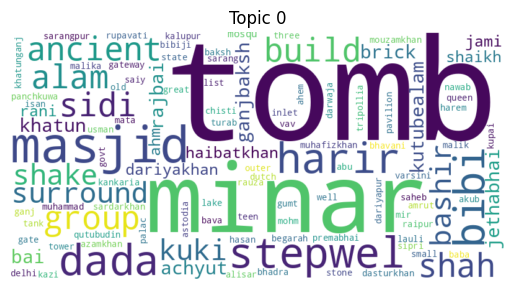

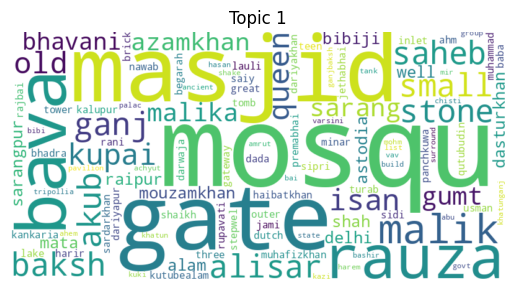

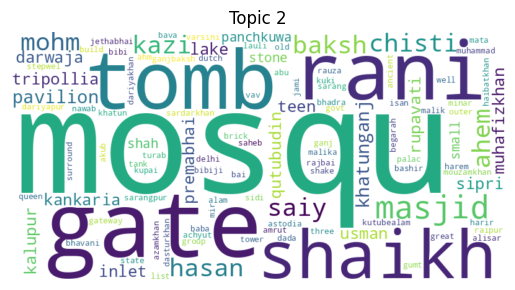

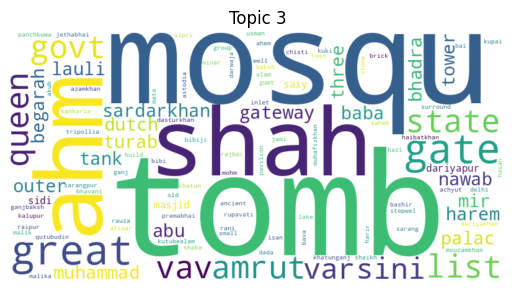

In [ ]:
# Generate word clouds for topics
from wordcloud import WordCloud
import matplotlib.pyplot as plt

for i, topic in enumerate(topic_word_matrix):
    plt.figure()
    # Use 'doc' instead of 'dictionary' to access word mappings
    wordcloud = WordCloud(width=800, height=400, background_color ='white').fit_words({doc[word_id]: topic_word_matrix[i][word_id] for word_id in range(len(doc))})
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Topic {i}")
    plt.show()

In [ ]:
# Print the perplexity values
print("Perplexity values:")
for m, perplexity in zip(x, perplexity_values):
    print("Num Topics =", m, " has Perplexity Score of", round(perplexity, 4))


Perplexity values:
Num Topics = 2  has Perplexity Score of -4.88
Num Topics = 3  has Perplexity Score of -5.0665
Num Topics = 4  has Perplexity Score of -5.2582
Num Topics = 5  has Perplexity Score of -5.3708
Num Topics = 6  has Perplexity Score of -5.3847
Num Topics = 7  has Perplexity Score of -5.5118
Num Topics = 8  has Perplexity Score of -5.5436
Num Topics = 9  has Perplexity Score of -5.5504
